# Computer Vision

In [33]:
# PyTorch
import torch
from torch import nn

# PyTorch for computer vision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Matplotlib
import matplotlib.pyplot as plt

# Versions
torch.__version__, torchvision.__version__

('2.1.0', '0.15.2a0')

## Preparing and exploring the data

### Importing datasets

In [34]:
# Training data

train_data = datasets.FashionMNIST(root="datasets",  # Directory of download
                                   train=True,  # Training data
                                   download=True,  # Download dataset
                                   transform=ToTensor(),  # Function used to transform image to tensor
                                   target_transform=None)  # Transform label/target

test_data = datasets.FashionMNIST(root="datasets",
                                  train=False,
                                  download=True,
                                  transform=ToTensor(),
                                  target_transform=None)

In [35]:
# Number of samples

print(f"Size of train data: {len(train_data)}")
print(f"Size of test data: {len(test_data)}")

Size of train data: 60000
Size of test data: 10000


### Exploring the data

In [36]:
# Taking a look at the data

image, label = train_data[0]
print(f"Shape of image tensor (Colors X Height X Width): {image.shape}")
print(f"Image label: {label}")
print(f"Image tensor: {image}")

Shape of image tensor (Colors X Height X Width): torch.Size([1, 28, 28])
Image label: 9
Image tensor: tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0

In [37]:
# Classes: label

train_data.class_to_idx, train_data.targets

({'T-shirt/top': 0,
  'Trouser': 1,
  'Pullover': 2,
  'Dress': 3,
  'Coat': 4,
  'Sandal': 5,
  'Shirt': 6,
  'Sneaker': 7,
  'Bag': 8,
  'Ankle boot': 9},
 tensor([9, 0, 0,  ..., 3, 0, 5]))

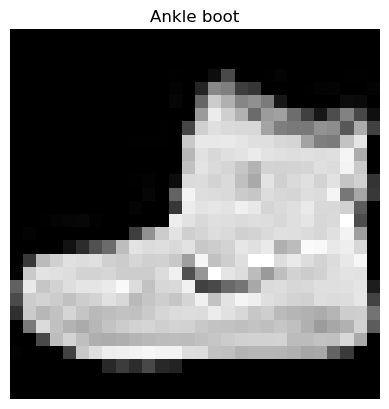

In [38]:
# Plotting (or showing) the images

plt.imshow(image.squeeze(), cmap="gray")
class_names = train_data.classes
plt.title(class_names[label])
plt.axis(False);

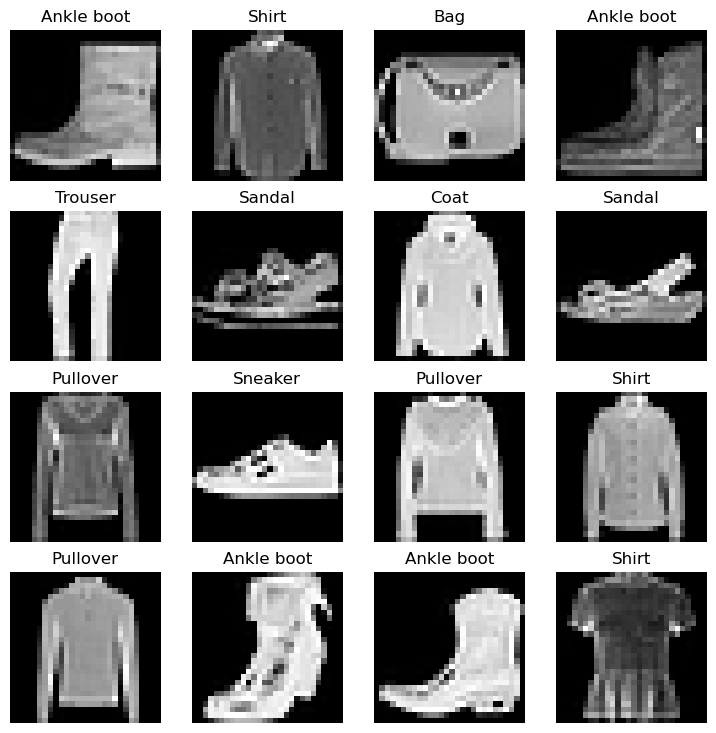

In [39]:
# Multiple image visualization

torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

### Turining data into mini-batches (dataloaders)

In [40]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x17ece998d90>,
 <torch.utils.data.dataloader.DataLoader at 0x17ecebf8ad0>)

In [41]:
print(f"Train dataloader of size {len(train_dataloader)} with batches of size {BATCH_SIZE}")
print(f"Test dataloader of size {len(test_dataloader)} with batches of size {BATCH_SIZE}")

train_images_batch, train_labels_batch = next(iter(train_dataloader))
print(f"Image batch tensor shape: {train_images_batch.shape}")
print(f"Label batch tensor shape: {train_labels_batch.shape}")


Train dataloader of size 1875 with batches of size 32
Test dataloader of size 313 with batches of size 32
Image batch tensor shape: torch.Size([32, 1, 28, 28])
Label batch tensor shape: torch.Size([32])


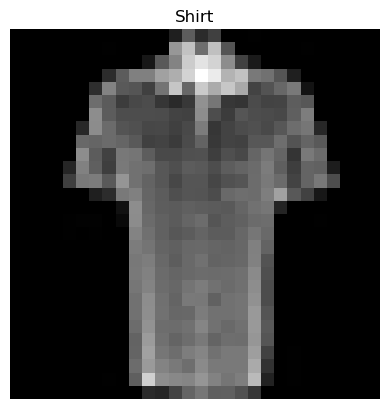

In [42]:
# Visualizing image from mini-batch

torch.manual_seed(42)
random_idx = torch.randint(0, len(train_images_batch), size=[1]).item()
image, label = train_images_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False);

## Building the model (v1)

In [43]:
# Flatten layer - converts HxW into number of pixels (for linear layers)

flatten_model = nn.Flatten()
sample = train_data[0][0]  # train_data is a tuple with input and label
output = flatten_model(sample)
print(f"Input before flatten: {sample.shape}")
print(f"Input after flatten: {output.shape}")

Input before flatten: torch.Size([1, 28, 28])
Input after flatten: torch.Size([1, 784])


In [44]:
# Building first model

class FashionMNISTModelv1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer_stack(x)

In [45]:
# Testing the model
torch.manual_seed(42)

model0 = FashionMNISTModelv1(input_shape=784, hidden_units=10, output_shape=len(class_names))
model0, next(model0.parameters()).device

(FashionMNISTModelv1(
   (layer_stack): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=784, out_features=10, bias=True)
     (2): Linear(in_features=10, out_features=10, bias=True)
   )
 ),
 device(type='cpu'))

In [46]:
# Prediction with a random tensor

dummy_x = torch.rand([1, 1, 28, 28])  # Batch size, color channels, height, width
torch.softmax(model0(dummy_x), dim=1)

tensor([[0.0819, 0.1160, 0.0891, 0.0656, 0.1533, 0.1044, 0.1167, 0.1106, 0.0764,
         0.0858]], grad_fn=<SoftmaxBackward0>)

In [47]:
model0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

## Training the model

### Preparing functions

In [48]:
# Performance measurers (accuracy in this case)
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
    print("helper_functions.py file already exists.")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

helper_functions.py file already exists.


In [49]:
# Recall from 02: For multiclass labeling: Loss - Cross Entropy; Optimizer - SGD or Adam
from helper_functions import accuracy_fn

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model0.parameters(), lr = 0.001)

loss_fn, optimizer, accuracy_fn

(CrossEntropyLoss(),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.001
     maximize: False
     weight_decay: 0
 ),
 <function helper_functions.accuracy_fn(y_true, y_pred)>)

In [50]:
# Measure model's training speed
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints time between start and end"""
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f}s")
    return total_time

In [51]:
start_time = timer()
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000s


2.769999991869554e-05

### Training loop

In [52]:
# Progress bar
from tqdm.auto import tqdm
torch.manual_seed(42)

# Training function
train_time_start_cpu = timer()
def train_model(epochs):
    train_time_start_cpu = timer()
    for epoch in tqdm(range(epochs)):
        train_loss = 0  # Used to calculate average loss per batch
        for batch, (X, y) in enumerate(train_dataloader):
            # Batch will be a number for each tuple of X inputs and y labels
            model0.train()

            model0.zero_grad()
            train_pred = model0(X)
            loss = loss_fn(train_pred, y)
            train_loss += loss  # Accumulate each batch loss
            loss.backward()
            optimizer.step()

            if (batch % 300 == 0):
                print(f"{batch}/{len(train_dataloader)} batches completed.")

        # Average the train loss of each batch (train loss per epoch)
        train_loss /= len(train_dataloader)

        test_loss, test_acc = 0, 0
        model0.eval()
        with torch.inference_mode():
            for X_test, y_test in test_dataloader:
                test_pred = model0(X_test)
                test_loss += loss_fn(test_pred, y_test).item()
                test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))
        
            # Test loss and acc per epoch
            test_loss /= len(test_dataloader)
            test_acc /= len(test_dataloader)
            print(f"Train loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")
    train_time_end_cpu = timer()
    total_train_time_model1 = print_train_time(start=train_time_start_cpu,
                                               end=train_time_end_cpu,
                                               device=str(next(model0.parameters()).device))
    return total_train_time_model1

In [53]:
total_train_time_model1 = train_model(3)

  0%|          | 0/3 [00:00<?, ?it/s]

0/1875 batches completed.
300/1875 batches completed.
600/1875 batches completed.
900/1875 batches completed.
1200/1875 batches completed.
1500/1875 batches completed.
1800/1875 batches completed.


 33%|███▎      | 1/3 [00:12<00:24, 12.50s/it]

Train loss: 0.6224 | Test loss: 0.5141 | Test acc: 82.0986
0/1875 batches completed.
300/1875 batches completed.
600/1875 batches completed.
900/1875 batches completed.
1200/1875 batches completed.
1500/1875 batches completed.
1800/1875 batches completed.


 67%|██████▋   | 2/3 [00:23<00:11, 11.87s/it]

Train loss: 0.4621 | Test loss: 0.4782 | Test acc: 82.8175
0/1875 batches completed.
300/1875 batches completed.
600/1875 batches completed.
900/1875 batches completed.
1200/1875 batches completed.
1500/1875 batches completed.
1800/1875 batches completed.


100%|██████████| 3/3 [00:35<00:00, 11.90s/it]

Train loss: 0.4380 | Test loss: 0.4659 | Test acc: 83.5164
Train time on cpu: 35.709s


## Making predictions and evaluating model

In [54]:
# Defining a function for future model evaluations

torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """Returns a dictionary containing the results of model prediction power on data_loader"""
    loss, acc = 0, 0
    model.eval()
    
    with torch.inference_mode():
        for X, y in data_loader:
            y_pred = model(X)
            loss += loss_fn(y_pred, y).item()
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
            "test_loss": loss,
            "test_acc": acc}

In [55]:
model0_results = eval_model(model=model0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)
model0_results

{'model_name': 'FashionMNISTModelv1',
 'test_loss': 0.4659402188592064,
 'test_acc': 83.51637380191693}

## Improving the model

In [56]:
# Setup device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [57]:
# Buiding a new (improved) model (on gpu and with non-linearity)
torch.manual_seed(42)

class FashionMNISTModelv2(nn.Module):
    def __init__(self, input_features: int, hidden_units: int, output_features: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer_stack(x)
    
# Initialize an instance of the new model on the gpu
model1 = FashionMNISTModelv2(input_features=784, hidden_units=10, output_features=len(class_names))
model1.to(device)
model1, next(model1.parameters()).device

(FashionMNISTModelv2(
   (layer_stack): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=784, out_features=10, bias=True)
     (2): ReLU()
     (3): Linear(in_features=10, out_features=10, bias=True)
     (4): ReLU()
   )
 ),
 device(type='cuda', index=0))

In [58]:
# Functions to be used in training and testing
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model1.parameters(), lr=0.1)

loss_fn, optimizer, accuracy_fn

(CrossEntropyLoss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     lr: 0.1
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ),
 <function helper_functions.accuracy_fn(y_true, y_pred)>)

In [59]:
# Training step
torch.manual_seed(42)

def train_step(model: nn.Module, 
               data_loader: torch.utils.data.DataLoader,
               loss_fn: nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    """Performs a training step on a model with the given dataloader"""
    train_loss, train_acc = 0, 0
    for X, y in data_loader:
        # Set training mode
        model.train()

        # Send batch to gpu
        X, y = X.to(device), y.to(device)

        # Training procedure
        model.zero_grad()
        train_pred = model(X)
        loss = loss_fn(train_pred, y)
        train_loss += loss.item()
        train_acc += accuracy_fn(y_true=y, y_pred=train_pred.argmax(dim=1))
        loss.backward()
        optimizer.step()

    # Average training performance per epoch
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f}")

In [60]:
# Testing step
torch.manual_seed(42)

def test_step(model: nn.Module, 
              data_loader: torch.utils.data.DataLoader,
              loss_fn: nn.Module,
              accuracy_fn,
              device: torch.device = device):
    """Performs a testing step on a model with the given dataloader"""
    model.eval()

    # Testing/evaluation procedure
    test_loss, test_acc = 0, 0
    with torch.inference_mode():
        for X, y in data_loader:
            # Send batch to gpu
            X, y = X.to(device), y.to(device)

            test_pred = model(X)
            loss = loss_fn(test_pred, y)
            test_loss += loss.item()
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        # Average testing/evaluation performance
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)

    # Printing out testing results
    print(f"Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")
    return {"model_name": model.__class__.__name__,
            "test_loss": test_loss,
            "test_acc": test_acc}

In [61]:
# Performing the training loop on the model
from timeit import default_timer as timer
from helper_functions import print_train_time
torch.manual_seed(42)

epochs = 3

train_time_start = timer()
for epoch in range(1, epochs+1):
    print(f"Epoch: {epoch}")
    print("--------------")
    train_step(model=model1, 
               data_loader=train_dataloader, 
               loss_fn=loss_fn, 
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
    print()
    
train_time_end = timer()
model1_results = test_step(model=model1,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn,
                           device=device)
total_train_time_model2 = print_train_time(start=train_time_start, 
                                           end=train_time_end, 
                                           device=device)
print(model1_results)

Epoch: 1
--------------
Train loss: 1.0920 | Train acc: 61.3433
Test loss: 0.9564 | Test acc: 64.9960

Epoch: 2
--------------
Train loss: 0.7810 | Train acc: 71.9283
Test loss: 0.7223 | Test acc: 73.9117

Epoch: 3
--------------
Train loss: 0.6703 | Train acc: 75.9367
Test loss: 0.6850 | Test acc: 75.0200

Test loss: 0.6850 | Test acc: 75.0200

Train time on cuda: 36.089 seconds
{'model_name': 'FashionMNISTModelv2', 'test_loss': 0.6850009720070294, 'test_acc': 75.01996805111821}


## Convolutional Neural Networks (CNN)

In [62]:
# Based on this: https://poloclub.github.io/cnn-explainer/#article-input

class FashionMNISTModelv3(nn.Module):
    """Model that simulates the TinyVGG architecture for CNNs"""
    def __init__(self, input_channels: int, hidden_units: int, output_features: int):
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_channels,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_features)
        )
    
    def forward(self, x):
        x = self.conv_block1(x)
        # print(x.shape)
        x = self.conv_block2(x)
        # print(x.shape)
        return self.classifier(x)
    
# Initialize an instance of the new model
torch.manual_seed(42)

model2 = FashionMNISTModelv3(input_channels=1,
                             hidden_units=10,
                             output_features=10)
model2.to(device)
model2, next(model2.parameters()).device

(FashionMNISTModelv3(
   (conv_block1): Sequential(
     (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (3): ReLU()
     (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (conv_block2): Sequential(
     (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (1): ReLU()
     (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
     (3): ReLU()
     (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   )
   (classifier): Sequential(
     (0): Flatten(start_dim=1, end_dim=-1)
     (1): Linear(in_features=490, out_features=10, bias=True)
   )
 ),
 device(type='cuda', index=0))

In [63]:
# Discovering the linear layer input size
with torch.inference_mode():
    image, label = next(iter(train_dataloader))
    image = image.to(device)
    y_pred = model2(image)

# Note: We're looking for the image (tensor) size after passing through the conv blocks
# torch.Size([32, 10, 14, 14])
# torch.Size([32, 10, 7, 7])

In [64]:
# Training and evaluating the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)
from timeit import default_timer as timer
from helper_functions import print_train_time

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model2.parameters(), lr=0.001)
epochs = 3

train_start_time = timer()
for epoch in range(1, epochs+1):
    print(f"Epoch: {epoch}")
    print("--------------")
    train_step(model=model2,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)
    print()

train_end_time = timer()
model2_results = test_step(model=model2,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn,
                           device=device)
total_train_time_model3 = print_train_time(start=train_start_time, 
                                           end=train_end_time, 
                                           device=device)
print(f"Model: {model2_results['model_name']}")
print(f"Test loss: {model2_results['test_loss']:.4f}")
print(f"Test acc: {model2_results['test_acc']:.4f}")

Epoch: 1
--------------


Train loss: 0.5366 | Train acc: 80.5483
Test loss: 0.3970 | Test acc: 85.8127

Epoch: 2
--------------
Train loss: 0.3599 | Train acc: 86.9633
Test loss: 0.3802 | Test acc: 86.1322

Epoch: 3
--------------
Train loss: 0.3234 | Train acc: 88.4067
Test loss: 0.3323 | Test acc: 88.0292

Test loss: 0.3323 | Test acc: 88.0292

Train time on cuda: 47.514 seconds
Model: FashionMNISTModelv3
Test loss: 0.3323
Test acc: 88.0292


## Comparing models and evaluating the CNN

In [65]:
import pandas as pd

compare_results = pd.DataFrame([model0_results,
                                model1_results,
                                model2_results])
compare_results

,model_name,test_loss,test_acc
0,FashionMNISTModelv1,0.465940,83.516374
1,FashionMNISTModelv2,0.685001,75.019968
2,FashionMNISTModelv3,0.332256,88.029153


In [66]:
compare_results["training_time"] = [total_train_time_model1,
                                    total_train_time_model2,
                                    total_train_time_model3]
compare_results

,model_name,test_loss,test_acc,training_time
0,FashionMNISTModelv1,0.465940,83.516374,35.709420
1,FashionMNISTModelv2,0.685001,75.019968,36.088606
2,FashionMNISTModelv3,0.332256,88.029153,47.513695


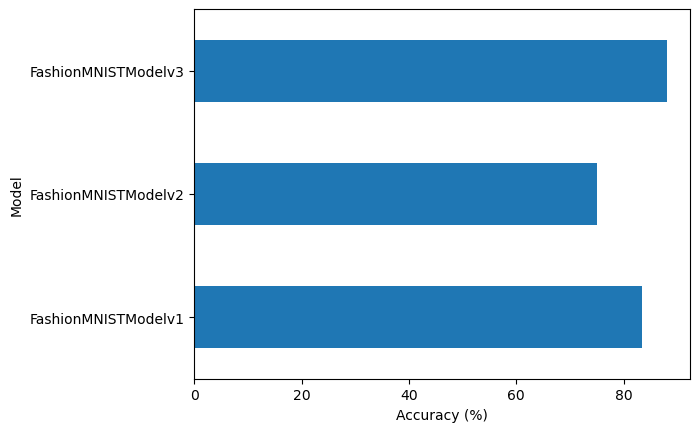

In [67]:
# Compare accuracies

compare_results.set_index("model_name")["test_acc"].plot(kind='barh')
plt.xlabel("Accuracy (%)")
plt.ylabel("Model");

In [68]:
# Defining a function to make predictions

def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    model.eval()
    model.to(device)
    pred_probs = []

    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)
            y_logits = model(sample)
            y_probs = torch.softmax(y_logits.squeeze(), dim=0)
            pred_probs.append(y_probs.cpu())
    
    return torch.stack(pred_probs)

In [69]:
# Retrieve test cases for predictions function
import random

test_samples = []
test_labels = []
# Get 9 random samples with the corresponding label from test dataset
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

In [70]:
# Get some predictions from the model

pred_probs = make_predictions(model=model2, data=test_samples, device=device)
pred_classes = torch.argmax(pred_probs, dim=1)
pred_classes, test_labels

(tensor([5, 2, 4, 7, 4, 3, 3, 0, 0]), [5, 6, 4, 7, 4, 3, 3, 0, 0])

P = Prediction | A = Actual/Truth


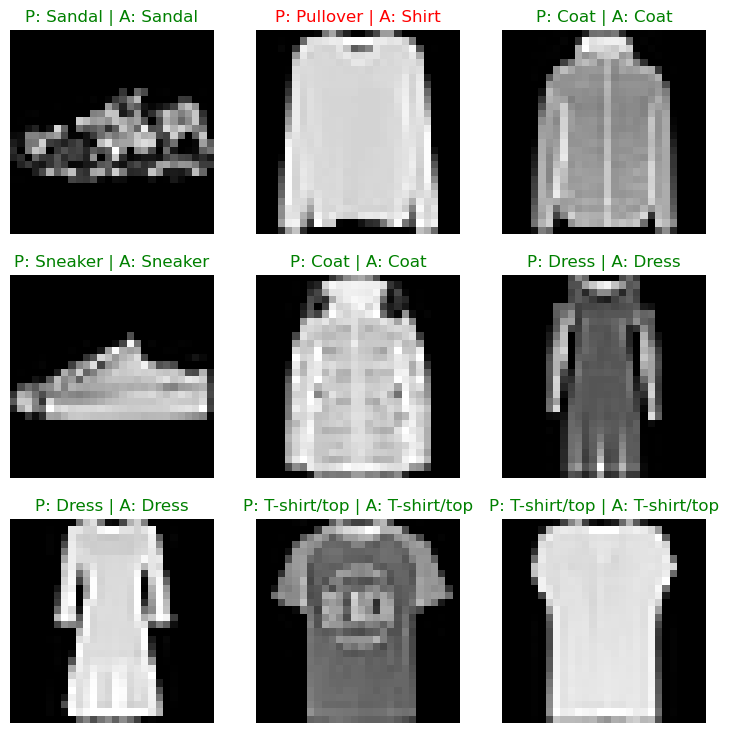

In [71]:
# Plot image samples and predictions

print("P = Prediction | A = Actual/Truth")
fig = plt.figure(figsize=(9, 9))
rows, cols = 3, 3
for i in range(1, rows*cols+1):
    fig.add_subplot(rows, cols, i)
    plt.imshow(X=test_samples[i-1].squeeze(), cmap='gray')
    plt.axis(False)
    pred = class_names[pred_classes[i-1]]
    label = class_names[test_labels[i-1]]
    title = f"P: {pred} | A: {label}"
    if pred == label:
        plt.title(title, c='g');
    else:
        plt.title(title, c='r')

In [72]:
# Getting all the testing predictions for the confusion matrix

y_preds = []
model2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader):
        X, y = X.to(device), y.to(device)
        y_logits = model2(X)
        y_pred = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim=1)
        y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

100%|██████████| 313/313 [00:01<00:00, 160.68it/s]


tensor([9, 2, 1,  ..., 0, 1, 7])

In [73]:
# Creating the confusion matrix
from torchmetrics import ConfusionMatrix

confmat = ConfusionMatrix(task='multiclass', num_classes=10)
confmat_tensor = confmat(y_pred_tensor, test_data.targets)
confmat_tensor

tensor([[670,   4,  21,  57,   7,   0, 232,   0,   9,   0],
        [  7, 855,   5, 114,   9,   0,   9,   0,   1,   0],
        [  9,   3, 770,  13, 119,   0,  78,   0,   8,   0],
        [ 29,   6,  20, 872,  24,   0,  43,   0,   5,   1],
        [  3,   2,  89,  49, 754,   0,  97,   0,   6,   0],
        [  7,   0,   0,   5,   1, 836,   3,  76,  53,  19],
        [ 83,   4,  96,  50,  87,   0, 669,   0,  11,   0],
        [  1,   0,   0,   0,   0,  22,   0, 942,   6,  29],
        [  7,   2,   6,  17,  12,   5,  36,   7, 906,   2],
        [  0,   0,   0,   1,   0,  25,   5, 138,  17, 814]])

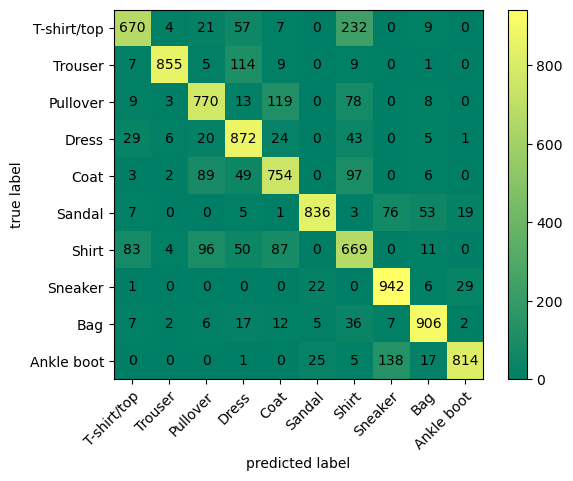

In [74]:
# Plotting the confusion matrix
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                colorbar=True,
                                class_names=test_data.classes,
                                cmap='summer',
                                fontcolor_threshold=1)

## Saving and loading the best model

In [75]:
# Saving model
from pathlib import Path

PATH = Path("models")
PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "03-FashionMNISTConvNet.pth"
SAVING_MODEL_PATH = PATH / MODEL_NAME

print(f"Saving model to {SAVING_MODEL_PATH}")
torch.save(obj=model2.state_dict(), f=SAVING_MODEL_PATH)

Saving model to models\03-FashionMNISTConvNet.pth


In [76]:
# Loading model

loaded_model2 = FashionMNISTModelv3(input_channels=1,
                                    hidden_units=10,
                                    output_features=10)
loaded_model2.to(device)
print(next(model2.parameters()).device)
loaded_model2.load_state_dict(torch.load(f=SAVING_MODEL_PATH))

cuda:0


<All keys matched successfully>

In [77]:
# Testing loaded model
torch.manual_seed(42)

loaded_model2_results = test_step(model=loaded_model2,
                                  data_loader=test_dataloader,
                                  loss_fn=loss_fn,
                                  accuracy_fn=accuracy_fn,
                                  device=device)
model2_results, loaded_model2_results

Test loss: 0.3323 | Test acc: 88.0292


({'model_name': 'FashionMNISTModelv3',
  'test_loss': 0.332256357295635,
  'test_acc': 88.02915335463258},
 {'model_name': 'FashionMNISTModelv3',
  'test_loss': 0.332256357295635,
  'test_acc': 88.02915335463258})

In [78]:
# Using a torch method to check if results are close

torch.isclose(input=torch.tensor(loaded_model2_results["test_acc"]),
              other=torch.tensor(model2_results["test_acc"]))

tensor(True)